# GDS Benchmark Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [2]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}

results_dir = "gdsio/grenoble/results"
results = "results.csv"
dataframe = pd.read_csv(f"{results_dir}/{results}", header=0)

dataframe

,num_nodes,num_gpus,threads_per_gpu,io_type,transfer_type,gpud_threads,dataset_size_kib,io_size_kib,throughput_gib_s,avg_latency,latency_usecs,iops,total_time_sec
0,1,8,1,WRITE,GPUD,8,635174912,16384,9.852354,12684.679250,38768,61.482771,NaN
1,1,8,4,WRITE,GPUD,32,1560117248,16384,24.743398,20213.052060,95222,60.130938,NaN
2,1,8,8,WRITE,GPUD,64,1596014592,16384,25.478187,39251.950163,97413,59.740441,NaN
3,1,8,16,WRITE,GPUD,128,1580646400,16384,25.516637,78341.597850,96475,59.076041,NaN
4,1,8,24,WRITE,GPUD,192,1480638464,16384,23.665193,127368.626425,90371,59.667669,NaN
5,1,8,1,READ,GPUD,8,981417984,16384,15.583259,8029.571479,59901,60.061449,NaN
6,1,8,4,READ,GPUD,32,2003451904,16384,32.051739,15767.395989,122281,59.611138,NaN
7,1,8,8,READ,GPUD,64,2011742208,16384,32.289699,31012.591095,122787,59.416685,NaN
8,1,8,16,READ,GPUD,128,2028044288,16384,32.500133,61582.535046,123782,59.510333,NaN
9,1,8,24,READ,GPUD,192,2305589248,16384,32.529434,92252.250453,140722,67.593590,NaN


## Parameters

* _Nodes_: **1**
* _GPUs_: **8**
* _Threads per GPU_: **1, 4, 8, 16, 24**
* _GPUD Threads Total_: **8, 32, 64, 128, 192**
* _Transfer Sizes_: **16 MiB**
* _Block Size_: **4 GiB**
* _Runtime_: **60 sec**
* _Transfer Type_: **GPUDirect (0)**


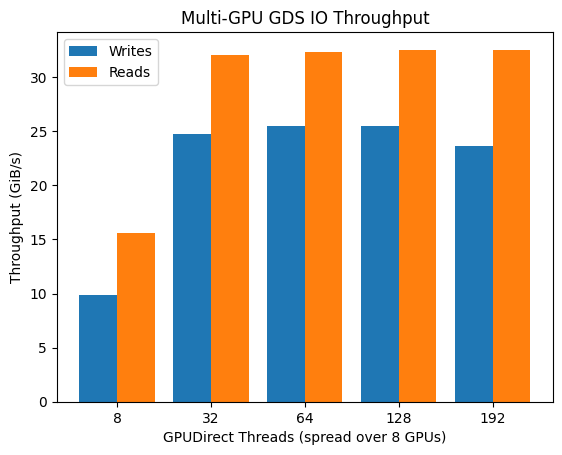

In [3]:
writes_all_df = dataframe.loc[(dataframe["io_type"] == "WRITE") & (dataframe["num_gpus"] == 8)]
reads_all_df = dataframe.loc[(dataframe["io_type"] == "READ") & (dataframe["num_gpus"] == 8)]
writes_single_df = dataframe.loc[(dataframe["io_type"] == "WRITE") & (dataframe["num_gpus"] == 1)]
reads_single_df = dataframe.loc[(dataframe["io_type"] == "READ") & (dataframe["num_gpus"] == 1)]

groups = [8, 32, 64, 128, 192]
writes = writes_all_df["throughput_gib_s"]
reads = reads_all_df["throughput_gib_s"]
x_axis = np.arange(len(groups))

plt.bar(x_axis - 0.2, writes, 0.4, label = 'Writes')
plt.bar(x_axis + 0.2, reads, 0.4, label = 'Reads')

plt.xticks(x_axis, groups)
plt.xlabel("GPUDirect Threads (spread over 8 GPUs)")
plt.ylabel("Throughput (GiB/s)")
plt.title("Multi-GPU GDS IO Throughput")
plt.legend()
plt.savefig("grenoble_gds_all_gpus.png", dpi=300)


## Parameters

* _Nodes_: **1**
* _GPUs_: **1**
* _Threads per GPU_: **1, 4, 8, 16, 24**
* _GPUD Threads Total_: **1, 4, 8, 16, 24**
* _Transfer Sizes_: **16 MiB**
* _Block Size_: **4 GiB**
* _Runtime_: **60 sec**
* _Transfer Type_: **GPUDirect (0)**


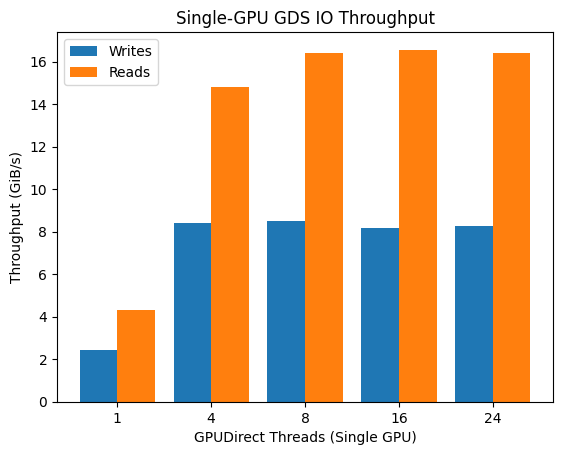

In [4]:
groups = [1, 4, 8, 16, 24]
writes = writes_single_df["throughput_gib_s"]
reads = reads_single_df["throughput_gib_s"]
x_axis = np.arange(len(groups))

plt.bar(x_axis - 0.2, writes, 0.4, label = 'Writes')
plt.bar(x_axis + 0.2, reads, 0.4, label = 'Reads')

plt.xticks(x_axis, groups)
plt.xlabel("GPUDirect Threads (Single GPU)")
plt.ylabel("Throughput (GiB/s)")
plt.title("Single-GPU GDS IO Throughput")
plt.legend()
plt.savefig("grenoble_gds_single_gpu.png", dpi=300)

3

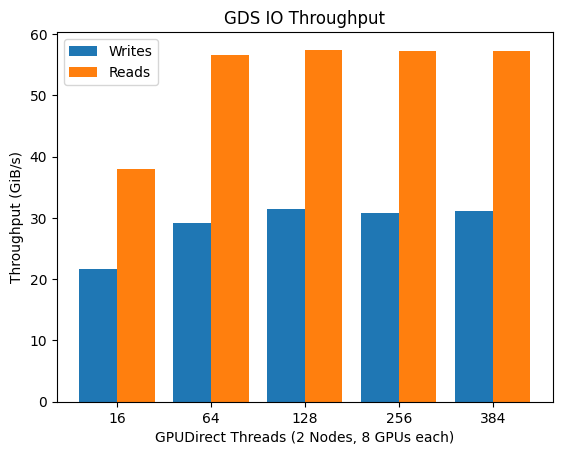